<a href="https://colab.research.google.com/github/pedrohortencio/applied-data-science-with-python/blob/main/Applied%20Plotting%2C%20Charting%20%26%20Data%20Representation%20in%20Python/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [ ]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.dates as dates
import matplotlib.ticker as ticker

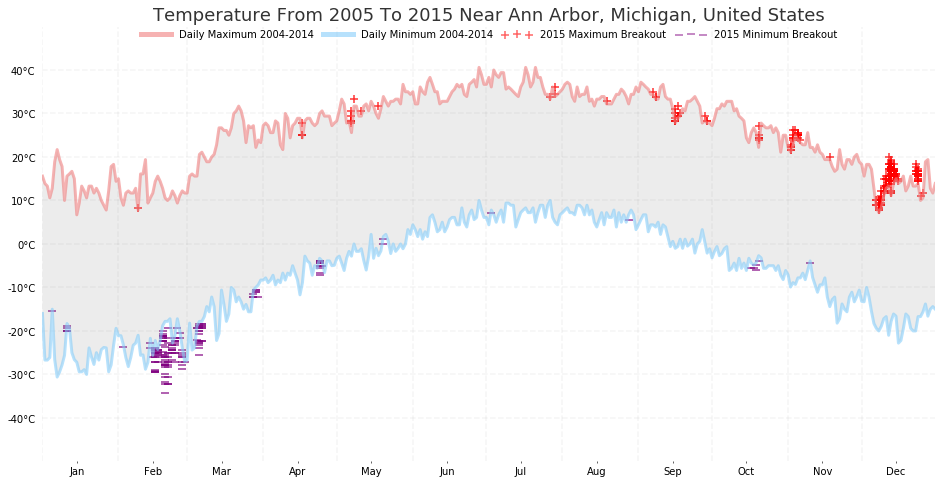

In [ ]:
# DATA CLEANING AND PREPARATION

# reading the file
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

# converting temperatures to degrees celcius
df['Data_Value'] = df['Data_Value']*0.1 

# creating columns with the year and the month and day
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month_Day'] = df['Date'].dt.strftime('%m-%d')

# removing February 29th
df = df[df['Month_Day'] != '02-29']

# max and min temperatures
temp_min = df[(df.Year >= 2005) & (df.Year < 2015) 
              & (df['Element'] == 'TMIN')].groupby(['Month_Day'])['Data_Value'].min() #returns the minimum temperature for each MM-DD
temp_max = df[(df.Year >= 2005) & (df.Year < 2015) 
              & (df['Element'] == 'TMAX')].groupby(['Month_Day'])['Data_Value'].max() #returns the maximum temperature for each MM-DD

# creating new columns with the Max_temp and Min_temperature of each day
df = df.merge(temp_max.reset_index(drop=False).rename(columns={'Data_Value': 'Max_temp'}), on='Month_Day', how='left')
df = df.merge(temp_min.reset_index(drop=False).rename(columns={'Data_Value': 'Min_temp'}), on='Month_Day', how='left')

# record-breaking temperatures
record_high = df[(df.Year == 2015) & (df.Data_Value > df.Max_temp)]
record_low = df[(df.Year == 2015) & (df.Data_Value < df.Min_temp)]

# PLOTTING

# creating an index of 2015 days
date_index = np.arange('2015-01-01', '2016-01-01', dtype = 'datetime64[D]')

plt.figure(figsize=(16, 8))

# line plot
plt.plot(date_index, temp_max, color = 'lightcoral', label = 'Daily Maximum 2004-2014', lw=3, alpha=0.6) # I'm using CSS code colors. A full list can be found in the matplotlib documentation
plt.plot(date_index, temp_min, color = 'lightskyblue', label = 'Daily Minimum 2004-2014', lw=3, alpha=0.6)

# scatter plot
plt.scatter(record_high.Date.values, record_high.Data_Value.values, label='2015 Maximum Breakout',
                                    marker='+', color='r', s=60, alpha=0.8)
plt.scatter(record_low.Date.values, record_low.Data_Value.values, label='2015 Minimum Breakout',
                          marker='_', color='purple', s=60, alpha=0.8)

#plt.legend()

# making a more elaborated and minimalistic legend (than the box one that is stantard)
legend = plt.legend(bbox_to_anchor=(0.1, .95, 0.8, .95), loc=3, ncol=4, mode='expand',
                    handlelength=3, scatterpoints=3)

# getting rid of the frame
legend.get_frame().set_alpha(0.)

for legend_line in legend.get_lines():
    legend_line.set_lw(5)

for scatter_legend in legend.legendHandles:
    scatter_legend._sizes = [80]
    scatter_legend.set_alpha(0.6)

# getting rid of the frame on the plot
plt.box(False)

# filling the area between the lines
ax = plt.gca()
ax.axis(['2015/01/01','2015/12/31',-50,50])
ax.fill_between(date_index, temp_max, temp_min, facecolor='grey', alpha =0.15)

plt.vlines(['2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07',
           '2015-08', '2015-09', '2015-10', '2015-11', '2015-12'], *ax.get_ylim(), color='k', linestyles='--', lw=0.3, alpha=0.2)

# Where you locate the major and minor ticks:
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=15)) # Put the label at the minor tick so it's in the center.

# What you put at the ticks:
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))


# changing the labels on Y axis
temp = [-40, -30, -20, -10, 0, 10, 20, 30, 40]    # first creating a list of the temperatures that I want in the Y axis
temp_label = list(map(lambda t: '{}°C'.format(t), temp)) # then I'm formating each one to include the °C
ax.set_yticks(temp)   # this changes the yticks to the temperatures.
ax.set_yticklabels(temp_label) # and this changes the labels


# I'll remove the ticks, so this makes dashed horizontal lines
plt.hlines(temp, *ax.get_xlim(), color='k', linestyles='--', lw=0.3, alpha=0.2)

plt.tick_params(top='off', bottom='off', left='off', right='off', labelbottom='off')

# setting a title
plt.title('Temperature From 2005 To 2015 Near Ann Arbor, Michigan, United States',
          size=18, alpha=0.8)
